## Morais MNS - EG/2020/4076
#### EC 7212 Computer Vision and Image Processing - Take Home Assignment 2


## Question 1: Otsu’s Thresholding on Noisy Image

#### Import Libraries and Define Functions

In [27]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def add_gaussian_noise_rgb(image, mean=0, sigma=20):
    """
    Adds Gaussian noise to each channel of the RGB image.
    """
    noisy = image.astype(np.int16)
    for c in range(3):
        noise = np.random.normal(mean, sigma, image.shape[:2]).astype(np.int16)
        noisy[:, :, c] += noise
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

def otsu_threshold(image):
    """
    Computes Otsu's threshold for a grayscale image.
    """
    hist = np.bincount(image.flatten(), minlength=256)
    total = image.size
    sum_total = np.dot(np.arange(256), hist)
    
    wB, muB = 0, 0
    wF, muF = 1, sum_total / total
    max_var, thresh = 0, 0

    for t in range(256):
        p_t = hist[t] / total
        wBn, wFn = wB + p_t, wF - p_t

        if wBn > 0:
            muB = (muB * wB + t * p_t) / wBn
        if wFn > 0:
            muF = (muF * wF - t * p_t) / wFn

        wB, wF = wBn, wFn
        var_between = wB * wF * (muB - muF)**2

        if var_between > max_var:
            max_var, thresh = var_between, t

    return thresh


##### Load and Display Original Image

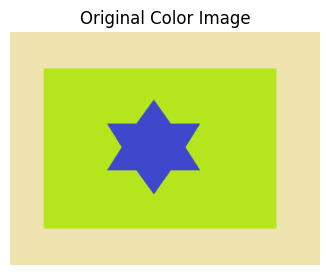

In [28]:
color_img = cv2.imread('image.png', cv2.IMREAD_COLOR)
img_dis = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(4,4))
plt.imshow(img_dis)
plt.title("Original Color Image")
plt.axis("off")
plt.show()


#### Add Gaussian Noise and Display

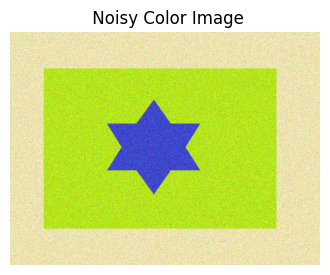

In [29]:
noisy_color = add_gaussian_noise_rgb(color_img)

plt.figure(figsize=(4,4))
plt.imshow(cv2.cvtColor(noisy_color, cv2.COLOR_BGR2RGB))
plt.title(" Noisy Color Image")
plt.axis("off")
plt.show()


#### Convert to Grayscale and Display

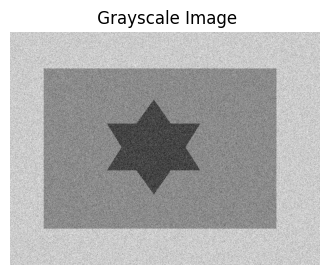

In [30]:
gray = cv2.cvtColor(noisy_color, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(4,4))
plt.imshow(gray, cmap='gray')
plt.title(" Grayscale Image")
plt.axis("off")
plt.show()


##### Display Histogram of Grayscale Image

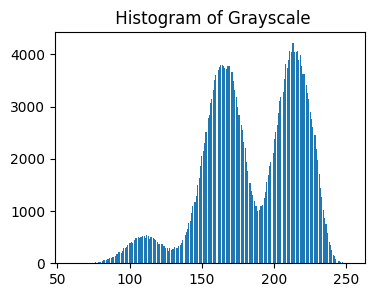

In [31]:
plt.figure(figsize=(4,3))
plt.hist(gray.ravel(), bins=256)
plt.title(" Histogram of Grayscale")
plt.show()


Compute and Print Otsu Threshold

In [32]:
t = otsu_threshold(gray)
print(f"Computed Otsu Threshold = {t}")


Computed Otsu Threshold = 184


#### Apply Threshold and Display Binary Image

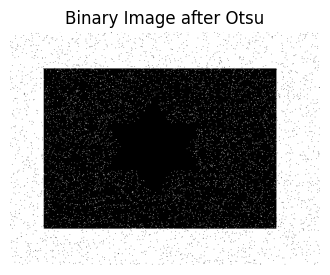

In [33]:
binary = (gray > t).astype(np.uint8) * 255

plt.figure(figsize=(4,4))
plt.imshow(binary, cmap='gray')
plt.title("Binary Image after Otsu")
plt.axis("off")
plt.show()


# Question 2: Region Growing Segmentation

#### Define Region Growing Function

In [34]:
def region_growing_color(img, seeds, tol):
    h, w, _ = img.shape
    mask = np.zeros((h, w), dtype=np.uint8)
    visited = np.zeros((h, w), dtype=bool)
    queue = list(seeds)
    
    for x, y in seeds:
        mask[x, y] = 255
        visited[x, y] = True
    
    while queue:
        x, y = queue.pop(0)
        current = img[x, y].astype(int)
        for dx in (-1, 0, 1):
            for dy in (-1, 0, 1):
                xn, yn = x + dx, y + dy
                if 0 <= xn < h and 0 <= yn < w and not visited[xn, yn]:
                    neigh = img[xn, yn].astype(int)
                    if np.linalg.norm(neigh - current) <= tol:
                        mask[xn, yn] = 255
                        queue.append((xn, yn))
                    visited[xn, yn] = True
    return mask


#### Load Original Image for Region Growing

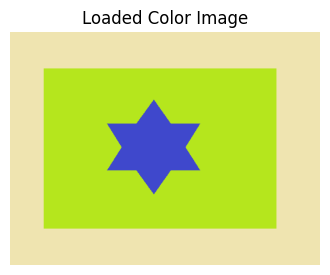

In [35]:
image_path = 'image.png'
img_color_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
if img_color_bgr is None:
    raise FileNotFoundError(f"Image not found at {image_path}")
img_rgb = cv2.cvtColor(img_color_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(4,4))
plt.imshow(img_rgb)
plt.title("Loaded Color Image")
plt.axis('off')
plt.show()


 #### Show Seed Points on the Image

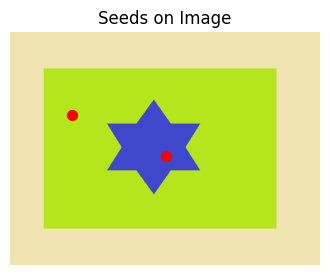

In [36]:
seeds = [(240, 300), (160, 120)]

plt.figure(figsize=(4,4))
plt.imshow(img_rgb)
plt.scatter([y for x, y in seeds], [x for x, y in seeds], c='red', s=50)
plt.title("Seeds on Image")
plt.axis('off')
plt.show()


#### Run Region Growing and Generate Mask

In [37]:
tolerance = 15
mask = region_growing_color(img_rgb, seeds, tolerance)


#### Display Region-Grown Binary Mask

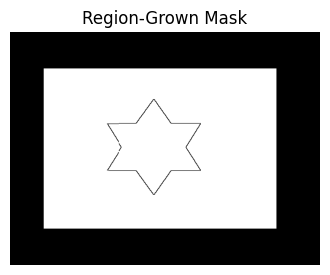

In [38]:
plt.figure(figsize=(4,4))
plt.imshow(mask, cmap='gray')
plt.title("Region-Grown Mask")
plt.axis('off')
plt.show()


#### Overlay Segmentation on Original Image

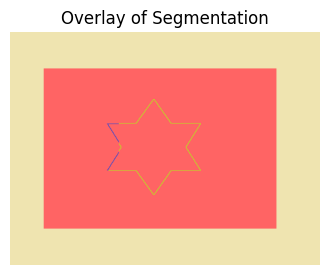

In [39]:
overlay = img_rgb.copy()
overlay[mask == 255] = [255, 100, 100]  # Highlight region in red

plt.figure(figsize=(4,4))
plt.imshow(overlay)
plt.title("Overlay of Segmentation")
plt.axis('off')
plt.show()
